In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

df = pd.read_csv("FyntraCustomerData.csv")

In [6]:
print(df.columns.tolist())

['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent']


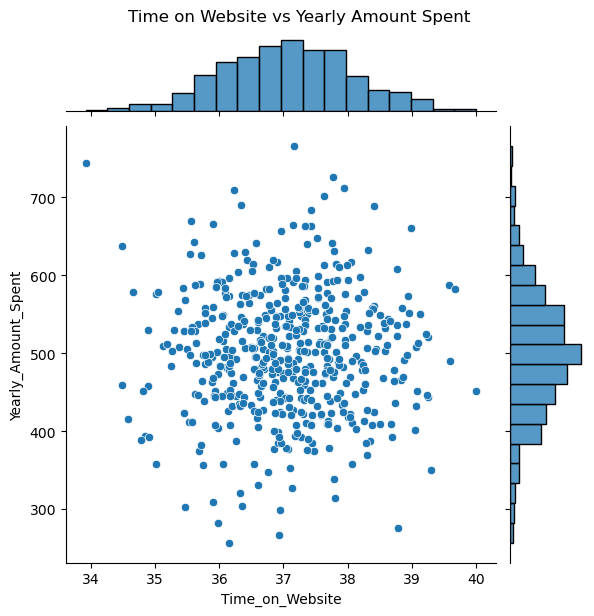

In [8]:
# 1. Jointplot: Time on Website vs Yearly Amount Spent
sns.jointplot(data=df, x='Time_on_Website', y='Yearly_Amount_Spent', kind='scatter')
plt.suptitle('Time on Website vs Yearly Amount Spent', y=1.02)
plt.savefig("jointplot_website_vs_spent.png")
plt.show()

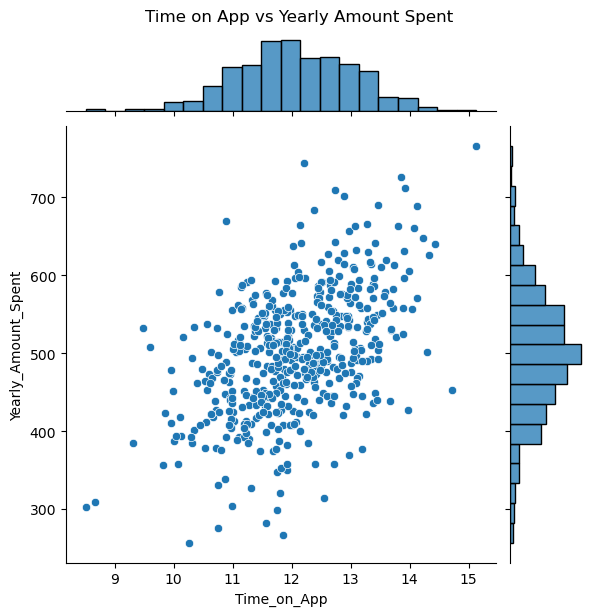

In [12]:
# 2. Jointplot: Time on App vs Yearly Amount Spent
sns.jointplot(data=df, x='Time_on_App', y='Yearly_Amount_Spent', kind='scatter')
plt.suptitle('Time on App vs Yearly Amount Spent', y=1.02)
plt.savefig("jointplot_app_vs_spent.png")
plt.show()

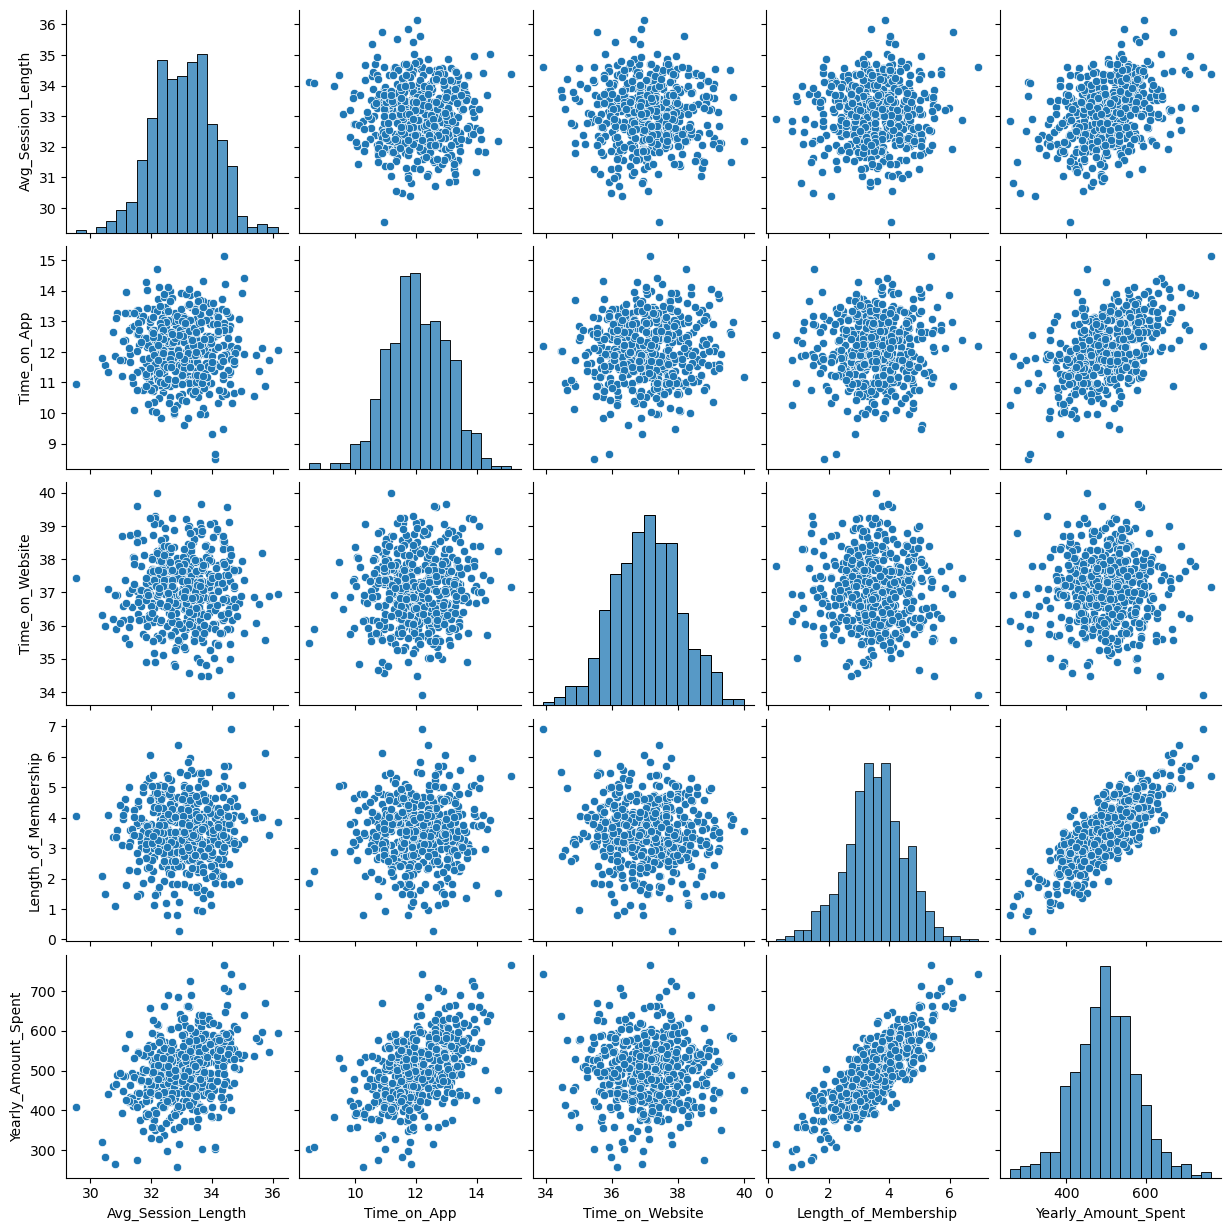

In [14]:
# 3. Pairplot to examine relationships
sns.pairplot(df)
plt.savefig("pairplot_all_features.png")
plt.show()

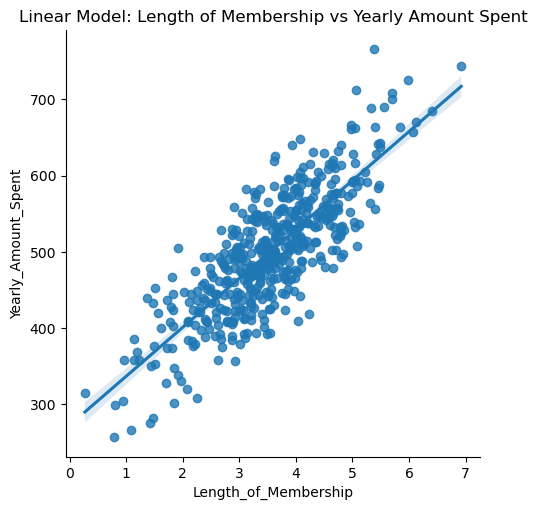

In [16]:
# 4. Linear model plot: Length of Membership vs Yearly Amount Spent
sns.lmplot(data=df, x='Length_of_Membership', y='Yearly_Amount_Spent')
plt.title('Linear Model: Length of Membership vs Yearly Amount Spent')
plt.savefig("lmplot_membership_vs_spent.png")
plt.show()

In [18]:
# 5. Train/Test Split
X = df[['Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership']]
y = df['Yearly_Amount_Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)


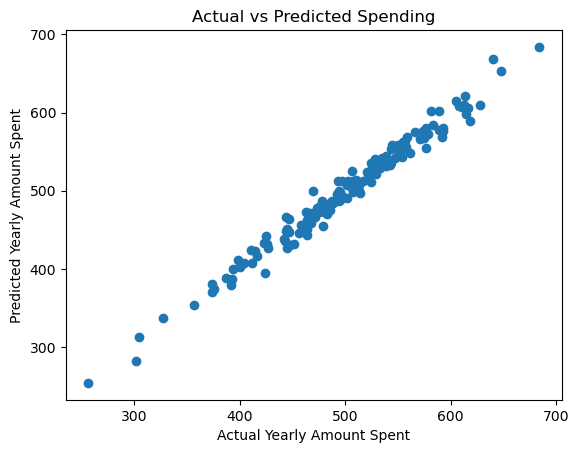

In [20]:
# 6. Train the model and make predictions
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, predictions)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs Predicted Spending")
plt.savefig("scatter_actual_vs_predicted.png")
plt.show()

In [22]:
# 7. Compute RMSE
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 10.57
